In [4]:
#%pip install ydata_profiling
#%pip install ipywidgets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# Se carga el archivo movies_clean.csv a un dataframe.
movies = pd.read_csv("movies_clean.csv")

# Pandas toma la variable release_date como object, la convertimos en datetime.
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45345 non-null  int64         
 1   genres                42962 non-null  object        
 2   id                    45345 non-null  int64         
 3   original_language     45334 non-null  object        
 4   overview              44404 non-null  object        
 5   popularity            45345 non-null  float64       
 6   production_companies  45345 non-null  object        
 7   production_countries  45345 non-null  object        
 8   release_date          45345 non-null  datetime64[ns]
 9   revenue               45345 non-null  int64         
 10  runtime               45099 non-null  float64       
 11  spoken_languages      45345 non-null  object        
 12  status                45265 non-null  object        
 13  tagline         

In [4]:
movies.head(3)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,director,name_collection,release_year,return
0,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,en,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,"['Universal Pictures', 'Illumination Entertain...",['United States of America'],2015-06-17,1156730962,91.0,['English'],Released,"Before Gru, they had a history of bad bosses",Minions,6.4,4729.0,"['Sandra Bullock', 'Jon Hamm', 'Michael Keaton...","['Kyle Balda', 'Pierre Coffin']",Despicable Me Collection,2015,15.63
1,149000000,"['Action', 'Adventure', 'Fantasy']",297762,en,An Amazon princess comes to the world of Man t...,294.337037,"['Dune Entertainment', 'Atlas Entertainment', ...",['United States of America'],2017-05-30,820580447,141.0,"['Deutsch', 'English']",Released,Power. Grace. Wisdom. Wonder.,Wonder Woman,7.2,5025.0,"['Gal Gadot', 'Chris Pine', 'Robin Wright', 'D...",['Patty Jenkins'],Wonder Woman Collection,2017,5.51
2,160000000,"['Family', 'Fantasy', 'Romance']",321612,en,A live-action adaptation of Disney's version o...,287.253654,"['Walt Disney Pictures', 'Mandeville Films']","['United Kingdom', 'United States of America']",2017-03-16,1262886337,129.0,['English'],Released,Be our guest.,Beauty and the Beast,6.8,5530.0,"['Emma Watson', 'Dan Stevens', 'Luke Evans', '...",['Bill Condon'],NaN,2017,7.89


In [5]:
# Se eliminan las variables que no nos interesan para la exploración de datos.
movies_subset = movies.drop(columns=['id', 'name_collection', 'tagline', 'status', 'overview'])

In [6]:
# Se chequean los valores nulos.
movies_subset.isna().sum()

budget                     0
genres                  2383
original_language         11
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                  246
spoken_languages           0
title                      0
vote_average               0
vote_count                 0
cast                       0
director                   0
release_year               0
return                     0
dtype: int64

In [7]:
# Se generan estadisticas descriptivas del dataframe.
movies_subset.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.534500e+04,45345.000000,4.534500e+04,45099.000000,45345.000000,45345.000000,45345.000000,4.534500e+04
mean,4.232673e+06,2.926296,1.123390e+07,94.179893,5.624320,110.137722,1991.882280,6.604937e+02
std,1.744391e+07,6.011008,6.441058e+07,38.346636,1.915178,491.904428,24.053016,7.471882e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,0.388844,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,1.130300,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,3.689610,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


[Text(0.5, 0, 'presupuesto'),
 Text(0, 0.5, 'ganancia'),
 Text(0.5, 1.0, 'Presupuesto vs Ganancia')]

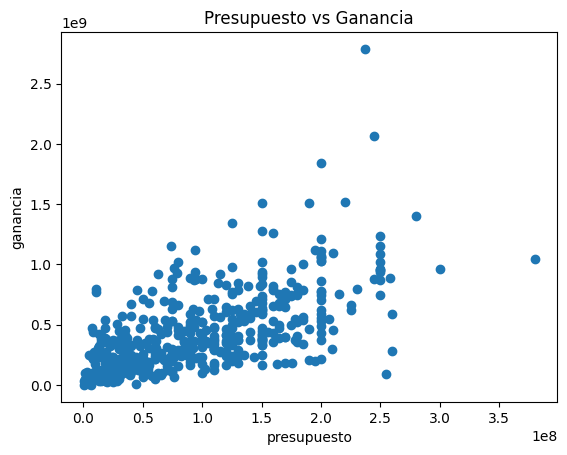

In [8]:
# Diagrama presupuesto vs ganancia donde la cantidad de votos fue mayor a 2000.
presupuesto = movies_subset.budget[movies_subset.vote_count.values >= 2000]
ganancia = movies_subset.revenue[movies_subset.vote_count.values >= 2000]

fig = plt.figure()
ax = plt.axes()

ax.scatter(presupuesto, ganancia)
ax.set(xlabel='presupuesto', ylabel='ganancia', title='Presupuesto vs Ganancia')

Se puede observar una ligera tendencia en donde a mayor presupuesto de las peliculas, mayor ganancia.

[Text(0.5, 0, 'Retorno'),
 Text(0, 0.5, 'Popularidad'),
 Text(0.5, 1.0, 'Retorno vs Popularidad')]

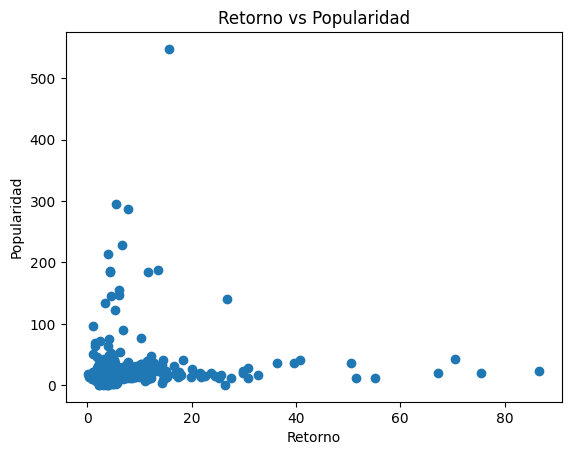

In [9]:
# Diagrama retorno vs popularidad donde la cantidad de votos fue mayor a 2000.
popularidad = movies_subset.popularity[movies_subset.vote_count.values >= 2000]
retorno = movies_subset['return'][movies_subset.vote_count.values >= 2000]
fig = plt.figure()
ax = plt.axes()

ax.scatter(retorno, popularidad)
ax.set(xlabel='Retorno', ylabel='Popularidad', title='Retorno vs Popularidad')

Se puede observar que aunque haya peliculas que tuvieron gran popularidad, el retorno fue menor, ya que suelen invertir mucho capital en estas.

C:\Users\Miguel\AppData\Local\Temp\ipykernel_8748\3582820129.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = movies.drop(columns=['id']).corr()


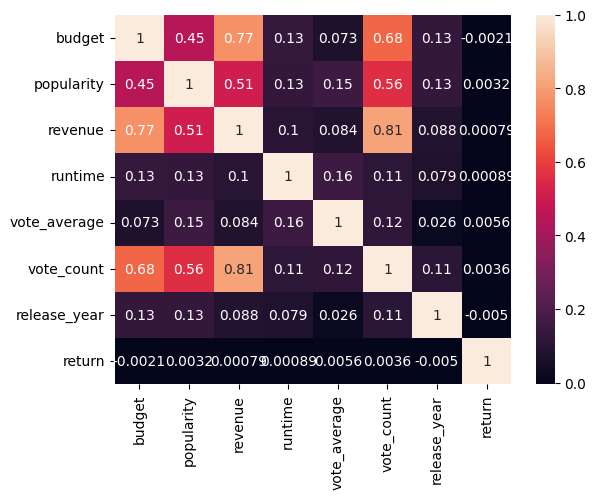

In [10]:
# Correlación de columnas.
import matplotlib.pyplot as plt
import seaborn as sns
corr = movies.drop(columns=['id']).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        annot=True);

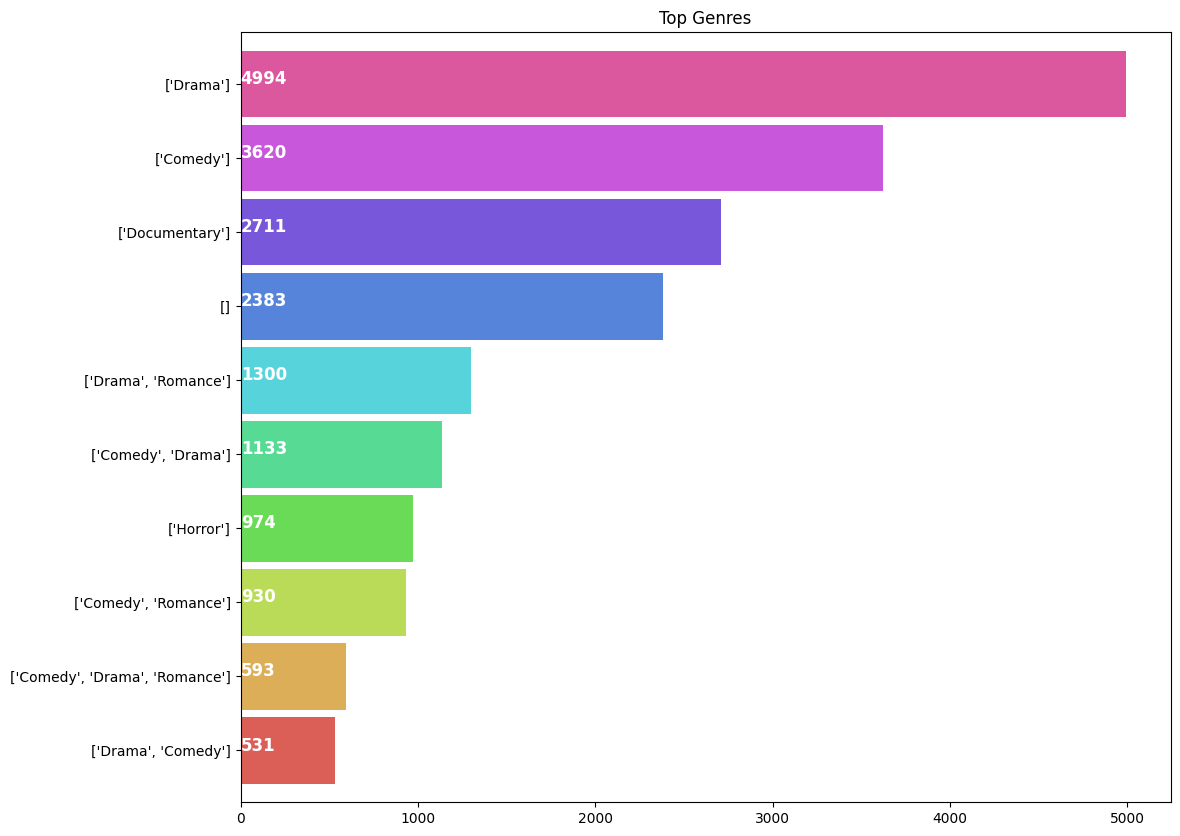

In [5]:
# Se genera un gráfico de barras de los géneros de peliculas que hay en el dataframe.
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.append(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

In [11]:
# Se genera un profile report de las variables restantes.
movies_subset[['genres', 'original_language', 'production_countries', 'release_year', 'runtime', 'vote_average']].profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Observaciones:
Se puede notar que conforme pasan los años, la cantidad de peliculas que se estrenan ha ido en aumento, solo en 2020 esta cantidad disminuyó debido al COVID-19.

Las 3 idiomas mas utilizados son el inglés, francés e italiano.

Los 3 países donde se hacen mas peliculas son Estados Unidos, Reino Unido y Francia.

Los 3 generos mas populares son drama, comedia y thriller.